# Exploratory Data Analysis
   ---
  *By Tan Yu Xuan                    20 Dec 2022*

# Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#change to nicer default style
plt.style.use('seaborn')
%matplotlib inline

The given dataset contains information of the resale flat transactions from Jan-2017 to 24-Nov-2022 in the following table.

With insights on these, we can draw correlations to see which features affect the resale flat prices and perhaps predict the future prices of resale flats.

**List of attributes**

| Attribute | Description |
|-----------|-------------|
|month|Month & Year of registration for resale flat transactions|
|town|Town|
|flat_type|Flat type|
|block|Block|
|street_name|Street name|
|storey_range|Storey range|
|floor_area_sqm|Floor area sqm|
|flat_model|Flat model|
|lease_commence_date|Year of lease commence|
|remaining_lease|Remaining lease|
|resale_price|Resale price in SGD|

# Importing Dataset

In [2]:
# Read csv into pandas DataFrame
df = pd.read_csv(r'data\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

# Resale Flat Prices Dataset

In [3]:
df.head()

month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.0  
4      265000.0

In [4]:
df.tail()

month    town         flat_type block   street_name storey_range  \
140845  2022-11  YISHUN         EXECUTIVE   277  YISHUN ST 22     10 TO 12   
140846  2022-11  YISHUN         EXECUTIVE   723  YISHUN ST 71     01 TO 03   
140847  2022-11  YISHUN         EXECUTIVE   828  YISHUN ST 81     04 TO 06   
140848  2022-11  YISHUN         EXECUTIVE   877  YISHUN ST 81     07 TO 09   
140849  2022-11  YISHUN  MULTI-GENERATION   666  YISHUN AVE 4     07 TO 09   

        floor_area_sqm        flat_model  lease_commence_date  \
140845           146.0        Maisonette                 1985   
140846           145.0         Apartment                 1986   
140847           146.0        Maisonette                 1988   
140848           146.0         Apartment                 1987   
140849           164.0  Multi Generation                 1987   

           remaining_lease  resale_price  
140845  61 years 11 months      808000.0  
140846  62 years 07 months      715000.0  
140847  64 years 04 months      780000.0  
140848  64 years 02 months      812000.0  
140849  64 years 02 months      960000.0

The following features to be modified for modeling preparation:
1. town - encoded
2. flat_type - encoded
3. flat_model - encoded
4. remaining_lease - converted to years

Features which can be engineered:
1. town - classify into mature & non-mature estates.
- mature estates (15 towns): Ang Mo Kio, Bedok, Bishan, Bukit Merah, Bukit Timah, Central, Clementi, Geylang, Kallang/Whampoa, Marine Parade, Pasir Ris, Queenstown, Serangoon, Tampines, Toa Payoh.
- non-mature estates: towns not mentioned above.
2. block & street_name: find out latitude & longitude to obtain location on map.
3. storey_range - classify into low-floor (01 to 03), mid-floor (04 to 09), high-floor units (above 09).


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140850 entries, 0 to 140849
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                140850 non-null  object 
 1   town                 140850 non-null  object 
 2   flat_type            140850 non-null  object 
 3   block                140850 non-null  object 
 4   street_name          140850 non-null  object 
 5   storey_range         140850 non-null  object 
 6   floor_area_sqm       140850 non-null  float64
 7   flat_model           140850 non-null  object 
 8   lease_commence_date  140850 non-null  int64  
 9   remaining_lease      140850 non-null  object 
 10  resale_price         140850 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 11.8+ MB


No missing data.
The following column to be changed:
1. month - change to datetime 
2. remaining_lease - change to float (convert to years)

In [6]:
df.nunique()

month                    71
town                     26
flat_type                 7
block                  2632
street_name             564
storey_range             17
floor_area_sqm          169
flat_model               21
lease_commence_date      54
remaining_lease         656
resale_price           3323
dtype: int64

# Duplicates
Assume there are no duplicates since the unit numbers are not given.

# Feature Engineering

## Town

Typically, mature estates are more developed and equipped with better amenities and public transport infrastructure. Resale flat prices are expected to be higher for mature estates.

Classifying 'town' to mature or non-mature estates:
1. Mature estate = 1
2. Non-mature estate = 0

In [7]:
df['town'].value_counts()

SENGKANG           11970
PUNGGOL            10300
WOODLANDS           9669
YISHUN              9587
TAMPINES            9458
JURONG WEST         9374
BEDOK               7615
HOUGANG             6917
CHOA CHU KANG       6447
ANG MO KIO          5905
BUKIT MERAH         5441
BUKIT PANJANG       5435
BUKIT BATOK         4694
TOA PAYOH           4544
PASIR RIS           4379
KALLANG/WHAMPOA     4221
QUEENSTOWN          4036
GEYLANG             3474
SEMBAWANG           3403
CLEMENTI            3214
JURONG EAST         2956
BISHAN              2713
SERANGOON           2654
CENTRAL AREA        1175
MARINE PARADE        894
BUKIT TIMAH          375
Name: town, dtype: int64

In [8]:
# Classify mature estates = 1, non-mature estates = 0
df.loc[(df['town'] == 'ANG MO KIO') | 
       (df['town'] == 'BEDOK') | 
       (df['town'] == 'BISHAN') | 
       (df['town'] == 'BUKIT MERAH') | 
       (df['town'] == 'BUKIT TIMAH') | 
       (df['town'] == 'CENTRAL AREA') | 
       (df['town'] == 'CLEMENTI') | 
       (df['town'] == 'GEYLANG') | 
       (df['town'] == 'KALLANG/WHAMPOA') | 
       (df['town'] == 'MARINE PARADE') | 
       (df['town'] == 'PASIR RIS') | 
       (df['town'] == 'QUEENSTOWN') | 
       (df['town'] == 'SERANGOON') | 
       (df['town'] == 'TAMPINES') | 
       (df['town'] == 'TOA PAYOH'), 'mature'] = 1 

df.loc[(df['town'] != 'ANG MO KIO') & 
       (df['town'] != 'BEDOK') & 
       (df['town'] != 'BISHAN') & 
       (df['town'] != 'BUKIT MERAH') & 
       (df['town'] != 'BUKIT TIMAH') & 
       (df['town'] != 'CENTRAL AREA') & 
       (df['town'] != 'CLEMENTI') & 
       (df['town'] != 'GEYLANG') & 
       (df['town'] != 'KALLANG/WHAMPOA') & 
       (df['town'] != 'MARINE PARADE') & 
       (df['town'] != 'PASIR RIS') & 
       (df['town'] != 'QUEENSTOWN') & 
       (df['town'] != 'SERANGOON') & 
       (df['town'] != 'TAMPINES') & 
       (df['town'] != 'TOA PAYOH'), 'mature'] = 0

df['mature'].value_counts()

0.0    80752
1.0    60098
Name: mature, dtype: int64

## Storey Range

High floor units are expected to be more expensive compared to units on lower floors due to several reasons:
1. Better views
2. Lesser noise
3. Better ventilation
4. More exposure to natural light
5. Fewer pests

Classifying the storey range as follows:
1. low-floor = 01 TO 03 storeys
2. mid-floor = 04 TO 09 storeys
3. high-floor = above 09 storeys

In [9]:
df['storey_range'].value_counts()

04 TO 06    32435
07 TO 09    29449
10 TO 12    26233
01 TO 03    24937
13 TO 15    13522
16 TO 18     6355
19 TO 21     2714
22 TO 24     1972
25 TO 27     1150
28 TO 30      737
31 TO 33      394
34 TO 36      369
37 TO 39      332
40 TO 42      163
43 TO 45       42
46 TO 48       33
49 TO 51       13
Name: storey_range, dtype: int64

In [10]:
df.loc[(df['storey_range'] == '01 TO 03'), 'units'] = 'low-floor' 

df.loc[(df['storey_range'] == '07 TO 09')| 
       (df['storey_range'] == '04 TO 06'), 'units'] = 'mid-floor'

df.loc[(df['storey_range'] != '01 TO 03') & 
       (df['storey_range'] != '04 TO 06') & 
       (df['storey_range'] != '07 TO 09'), 'units'] = 'high-floor'

df['units'].value_counts()

mid-floor     61884
high-floor    54029
low-floor     24937
Name: units, dtype: int64

## Remaining Lease

Remaining lease is the number of years left on the lease of an HDB resale flat.
The flats will revert to HDB, the landowner, upon expiry of their leases. HDB will in turn surrender the land to the State.
Therefore, resale flat prices are expected to be higher for flats with longer remaining lease.

Standardise remaining lease in years:

In [11]:
years = df['remaining_lease'].str.findall('(\d+)').str[0].astype(float)
print(years.describe())

count    140850.000000
mean         74.340248
std          13.592608
min          43.000000
25%          63.000000
50%          74.000000
75%          86.000000
max          97.000000
Name: remaining_lease, dtype: float64


In [12]:
months = df['remaining_lease'].str.findall('(\d+)').str[1].astype(float)
months = months.fillna(0)
print(months.describe())
months.isnull().value_counts()

count    140850.000000
mean          5.539226
std           3.465462
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          11.000000
Name: remaining_lease, dtype: float64


False    140850
Name: remaining_lease, dtype: int64

In [14]:
df['remaining_lease_in_years'] = (months / 12) + years
print(df['remaining_lease_in_years'].describe())

count    140850.000000
mean         74.801851
std          13.590420
min          43.250000
25%          63.833333
50%          74.833333
75%          86.250000
max          97.750000
Name: remaining_lease_in_years, dtype: float64


## Resale Price / Floor Area

Resale flat prices are divided by floor area to find out the price / sqm

In [15]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

In [16]:
df['price_per_sqm'].head()

0    5272.727273
1    3731.343284
2    3910.447761
3    3897.058824
4    3955.223881
Name: price_per_sqm, dtype: float64

## Month

Prices of resale flats are expected to increase in time due to several reasons such as:
1. Higher demand, especially due to the pandemic-related disruptions in construction sector.
2. Higher cost of living, buyers may be more price sensitive and would opt for cheaper homes.

Convert to datetime and obtain the year of resale flat registration.

In [18]:
df['year_sold'] = pd.to_datetime(df['month']).dt.year
df['year_sold'].value_counts()

2021    29087
2022    24174
2020    23333
2019    22186
2018    21561
2017    20509
Name: year_sold, dtype: int64

## Block & Street Name

Combining block & street_name to obtain address, then get the latitude, longitude and altitude columns in order to plot locations on map to see the concentration of resale flats sold in Singapore since 2017.

Areas with high concentration of resale flats sold could serve as a guideline to boost future sales.

In [19]:
#combine block and street_name column into new column, with space in between 
df['address'] = df['block'] + ' ' + df['street_name']

# get unique values of addresses
address = [x for x in df['address'].unique().tolist() if type(x) == str]
print(len(address))

9361


In [ ]:
#Geocode by address 
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

lat = []
long =  []
add = []

geolocator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

for i in range(0, len(address)):
    location = geolocator.geocode(address[i], timeout=20)
    if location is None:
        lat.append(None)
        long.append(None)
        add.append(address[i])
    else:
        unit_lat = location.latitude
        unit_long = location.longitude
    lat.append(unit_lat)
    long.append(unit_long)
    add.append(address[i])

In [98]:
print(lat[-1])
print(long[-1])
print(add[-1])
print(len(lat))
print(len(long))
print(len(add))

1.4283147
103.8461809
677A YISHUN RING RD
10481
10481
10481


In [99]:
# create a dataframe with the address, latitude and longitude
df_ = pd.DataFrame({'address':add, 'latitude':lat, 'longitude':long})

In [102]:
df_ = df_.drop_duplicates(subset=['address'])

df_.to_csv(r'C:\Users\Tan Yu Xuan\Desktop\resale-flat\data\coordinates_csv.csv')

In [20]:
df_ = pd.read_csv(r'data\coordinates_csv.csv')
df_.head()

Unnamed: 0                address  latitude   longitude
0           0  406 ANG MO KIO AVE 10  1.374699  103.854835
1           1   108 ANG MO KIO AVE 4  1.382226  103.838766
2           2   602 ANG MO KIO AVE 5  1.380760  103.835425
3           3  465 ANG MO KIO AVE 10  1.366223  103.857175
4           4   601 ANG MO KIO AVE 5  1.380987  103.835076

In [21]:
# merge on 'address' with df_ to get the columns
df = df.merge(df_, on='address', how='left')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140850 entries, 0 to 140849
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   month                     140850 non-null  object 
 1   town                      140850 non-null  object 
 2   flat_type                 140850 non-null  object 
 3   block                     140850 non-null  object 
 4   street_name               140850 non-null  object 
 5   storey_range              140850 non-null  object 
 6   floor_area_sqm            140850 non-null  float64
 7   flat_model                140850 non-null  object 
 8   lease_commence_date       140850 non-null  int64  
 9   remaining_lease           140850 non-null  object 
 10  resale_price              140850 non-null  float64
 11  mature                    140850 non-null  float64
 12  units                     140850 non-null  object 
 13  remaining_lease_in_years  140850 non-null  f

In [23]:
# Drop unnamed column
df = df.drop(['Unnamed: 0'], axis=1)

In [24]:
#df['latitude'].notnull().value_counts()
lat_notnull = df['latitude'].dropna()
long_notnull = df['longitude'].dropna()

In [25]:
import folium
from folium.plugins import FastMarkerCluster

folium_map = folium.Map(location=[1.3521,103.8198],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


FastMarkerCluster(data=list(zip(lat_notnull.values, long_notnull.values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

## Correlation Plots
Ranking the following to find out the correlation:
1. Flat type
2. Town
3. Units (low, mid or high floors)

### Flat Type
Rank the flat type:
1 - 1 Room;
2 - 2 Room;
3 - 3 Room;
4 - 4 Room;
5 - 5 Room;
6 - Executive;
7 - Multi-Generation

In [26]:
flat_type_dict = {'1 ROOM': 1,'2 ROOM': 2,'3 ROOM': 3,'4 ROOM': 4,'5 ROOM': 5,'EXECUTIVE': 6,'MULTI-GENERATION': 7}
df['flat_type_rank'] = df['flat_type'].replace(flat_type_dict)

### Town

Rank town according to least no. of resale flats sold to most sold.
Town where the least no. of resale flats sold are expected to be more expensive.

In [27]:
df['town'].value_counts(sort=True)

SENGKANG           11970
PUNGGOL            10300
WOODLANDS           9669
YISHUN              9587
TAMPINES            9458
JURONG WEST         9374
BEDOK               7615
HOUGANG             6917
CHOA CHU KANG       6447
ANG MO KIO          5905
BUKIT MERAH         5441
BUKIT PANJANG       5435
BUKIT BATOK         4694
TOA PAYOH           4544
PASIR RIS           4379
KALLANG/WHAMPOA     4221
QUEENSTOWN          4036
GEYLANG             3474
SEMBAWANG           3403
CLEMENTI            3214
JURONG EAST         2956
BISHAN              2713
SERANGOON           2654
CENTRAL AREA        1175
MARINE PARADE        894
BUKIT TIMAH          375
Name: town, dtype: int64

In [28]:
town_dict = {'ANG MO KIO': 10,
             'BEDOK': 7,
             'BISHAN': 22,
             'BUKIT BATOK': 13,
             'BUKIT MERAH': 11,
             'BUKIT PANJANG': 12,
             'BUKIT TIMAH': 26,
             'CENTRAL AREA': 24,
             'CHOA CHU KANG': 9,
             'CLEMENTI': 20,
             'GEYLANG': 18,
             'HOUGANG': 8,
             'JURONG EAST': 21,
             'JURONG WEST': 6,
             'KALLANG/WHAMPOA': 16,
             'MARINE PARADE': 25,
             'PASIR RIS': 15,
             'PUNGGOL': 2,
             'QUEENSTOWN': 17,
             'SEMBAWANG': 19,
             'SENGKANG': 1,
             'SERANGOON': 23,
             'TAMPINES': 5,
             'TOA PAYOH': 14,
             'WOODLANDS': 3,
             'YISHUN': 4,}
df['town_rank'] = df['town'].replace(town_dict)

### Units

In [29]:
units_dict = {'low-floor': 1,'mid-floor': 2,'high-floor': 3}
df['units_rank'] = df['units'].replace(units_dict)

### Correlation Plot

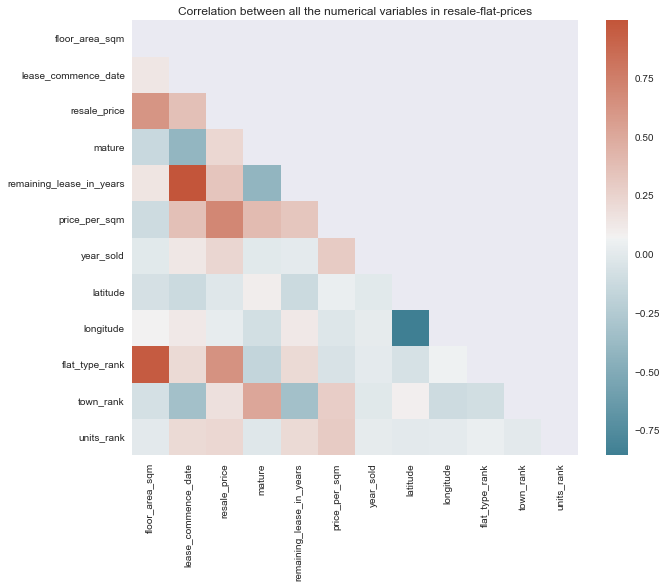

In [81]:
# Set up mask to be "True" in the upper triangle.
plt.figure(figsize=(10,8))
mask = np.zeros_like(df.corr().iloc[0:,0:])
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df.corr().iloc[0:,0:], mask=mask,cmap=cmap).set(title="Correlation between all the numerical variables in resale-flat-prices");

In [31]:
df.corr()

floor_area_sqm  lease_commence_date  resale_price  \
floor_area_sqm                  1.000000             0.139210      0.614844   
lease_commence_date             0.139210             1.000000      0.357486   
resale_price                    0.614844             0.357486      1.000000   
mature                         -0.138613            -0.413843      0.220161   
remaining_lease_in_years        0.142386             0.992307      0.332037   
price_per_sqm                  -0.114603             0.362516      0.695729   
year_sold                      -0.006352             0.126305      0.229150   
latitude                       -0.073783            -0.126135     -0.024415   
longitude                       0.067922             0.123781      0.022068   
flat_type_rank                  0.951452             0.206344      0.628368   
town_rank                      -0.078339            -0.332809      0.172121   
units_rank                     -0.001719             0.207748      0.225602   

                            mature  remaining_lease_in_years  price_per_sqm  \
floor_area_sqm           -0.138613                  0.142386      -0.114603   
lease_commence_date      -0.413843                  0.992307       0.362516   
resale_price              0.220161                  0.332037       0.695729   
mature                    1.000000                 -0.416941       0.389194   
remaining_lease_in_years -0.416941                  1.000000       0.327383   
price_per_sqm             0.389194                  0.327383       1.000000   
year_sold                -0.005220                  0.005970       0.298346   
latitude                  0.093591                 -0.126315       0.035221   
longitude                -0.089498                  0.123429      -0.032639   
flat_type_rank           -0.166977                  0.208492      -0.056926   
town_rank                 0.508469                 -0.332876       0.279597   
units_rank               -0.025570                  0.207833       0.292019   

                          year_sold  latitude  longitude  flat_type_rank  \
floor_area_sqm            -0.006352 -0.073783   0.067922        0.951452   
lease_commence_date        0.126305 -0.126135   0.123781        0.206344   
resale_price               0.229150 -0.024415   0.022068        0.628368   
mature                    -0.005220  0.093591  -0.089498       -0.166977   
remaining_lease_in_years   0.005970 -0.126315   0.123429        0.208492   
price_per_sqm              0.298346  0.035221  -0.032639       -0.056926   
year_sold                  1.000000 -0.010489   0.014393        0.004102   
latitude                  -0.010489  1.000000  -0.857109       -0.066547   
longitude                  0.014393 -0.857109   1.000000        0.057987   
flat_type_rank             0.004102 -0.066547   0.057987        1.000000   
town_rank                 -0.017999  0.082746  -0.116002       -0.093279   
units_rank                 0.010783  0.000737   0.004381        0.034112   

                          town_rank  units_rank  
floor_area_sqm            -0.078339   -0.001719  
lease_commence_date       -0.332809    0.207748  
resale_price               0.172121    0.225602  
mature                     0.508469   -0.025570  
remaining_lease_in_years  -0.332876    0.207833  
price_per_sqm              0.279597    0.292019  
year_sold                 -0.017999    0.010783  
latitude                   0.082746    0.000737  
longitude                 -0.116002    0.004381  
flat_type_rank            -0.093279    0.034112  
town_rank                  1.000000    0.001209  
units_rank                 0.001209    1.000000

Our label will be the column 'resale_price' so we will look at the correlation of the other features against it.
- Strong positive correlation with 'floor_area_sqm' which makes sense since bigger flats (larger floor area) will be more expensive.
- Strong positive correlation with 'price_per_sqm' which is 'resale_price' / 'floor_area_sqm'.
- Strong positive correlation with 'flat_type_rank'. Since 'flat_type' is ranked by room size (1=1-room, 2=2-room, etc), higher rank means larger floor area which is more expensive.
- Positive correlation with 'lease_commence_date' and 'remaining_lease_in_years. Newer resale flats have longer remaining lease which is a measurement of the flat value.
- Positive correlation with 'year_sold'. High demand and low supply of resale flats increase prices of resale flats.
- Positive correlation with 'mature'. Mature estates which are more developed cost more than non-mature estates.
- Positive correlation with 'units_rank'. Resale flats at higher floors are more expensive than flats at lower floors.

# Unused Columns

In [71]:
df.drop(columns = 'flat_model', inplace = True)

In [72]:
df.sort_index(inplace=True)

In [73]:
df.head()

month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm  lease_commence_date     remaining_lease  resale_price  ...  \
0            44.0                 1979  61 years 04 months      232000.0  ...   
1            67.0                 1978  60 years 07 months      250000.0  ...   
2            67.0                 1980  62 years 05 months      262000.0  ...   
3            68.0                 1980   62 years 01 month      265000.0  ...   
4            67.0                 1980  62 years 05 months      265000.0  ...   

        units remaining_lease_in_years  price_per_sqm  year_sold  \
0  high-floor                61.333333    5272.727273       2017   
1   low-floor                60.583333    3731.343284       2017   
2   low-floor                62.416667    3910.447761       2017   
3   mid-floor                62.083333    3897.058824       2017   
4   low-floor                62.416667    3955.223881       2017   

                 address  latitude   longitude  flat_type_rank  town_rank  \
0  406 ANG MO KIO AVE 10  1.374699  103.854835               2         10   
1   108 ANG MO KIO AVE 4  1.382226  103.838766               3         10   
2   602 ANG MO KIO AVE 5  1.380760  103.835425               3         10   
3  465 ANG MO KIO AVE 10  1.366223  103.857175               3         10   
4   601 ANG MO KIO AVE 5  1.380987  103.835076               3         10   

   units_rank  
0           3  
1           1  
2           1  
3           2  
4           1  

[5 rows x 21 columns]

In [75]:
#df.to_csv(r'C:\Users\Tan Yu Xuan\Desktop\resale-flat\data\clean_csv.csv')

# EDA

## Resale Price

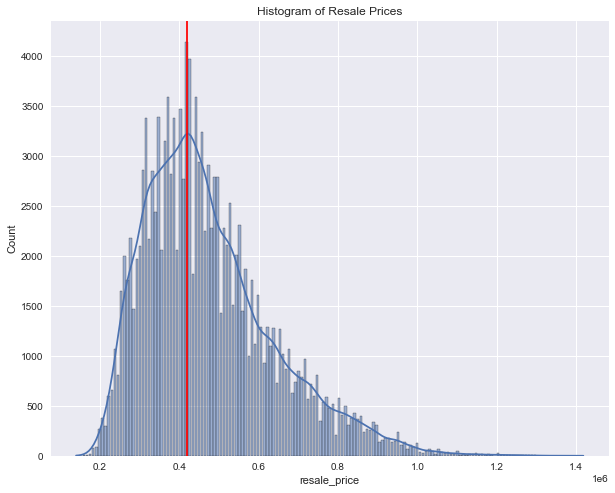

In [79]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='resale_price', kde=True, palette='pastel', shrink=.8).set(title='Histogram of Resale Prices')

# plot mode line for resale price
resale_price_mode = df['resale_price'].mode().values
plt.axvline(x=resale_price_mode, color='r')

From the graph, prices of resale flats range very widely. Majority of the resale flats are sold for SGD 300k-500k. Mode of the resale flat price is 420k.

## Flat Type

In [33]:
df_flat_type = df.sort_values(by=['flat_type'])

[Text(0.5, 1.0, 'Boxplot of Flat Type by Resale Prices')]

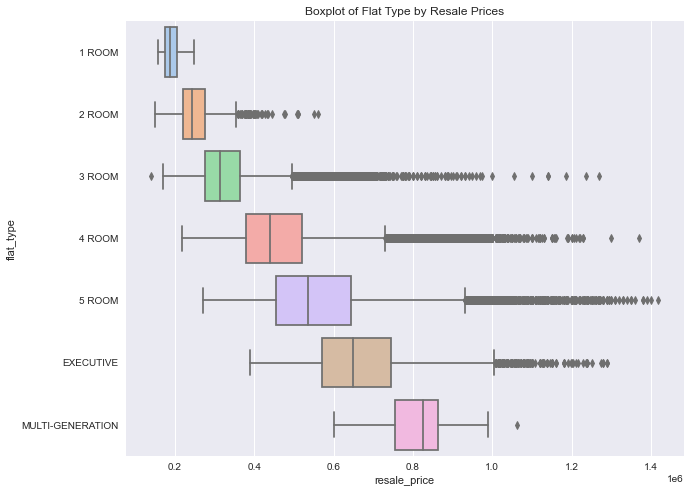

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_flat_type, x='resale_price', y='flat_type', palette='pastel').set(title='Boxplot of Flat Type by Resale Prices')

Resale flat prices increase as the no. of room increases.

## Floor Area

[None]

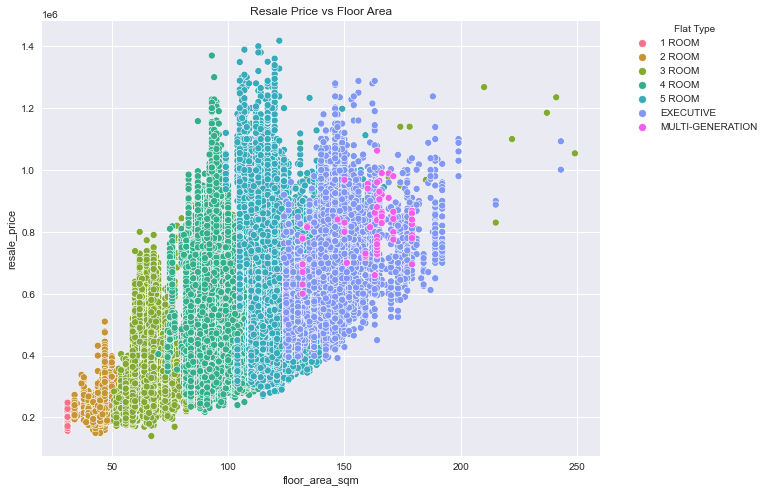

In [77]:
# resale price vs floor area
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_flat_type, y='resale_price', x='floor_area_sqm', hue='flat_type').set(title='Resale Price vs Floor Area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0).set(title='Flat Type')

Flat type is classified by floor area. Therefore, prices of resale flat increase as floor area increases.

## Storey Range

In [36]:
df_storey_range = df.sort_values(by=['storey_range'], ascending=False)

[Text(0.5, 1.0, 'Boxplot of Storey Range by Resale Prices per Floor Area (sqm)')]

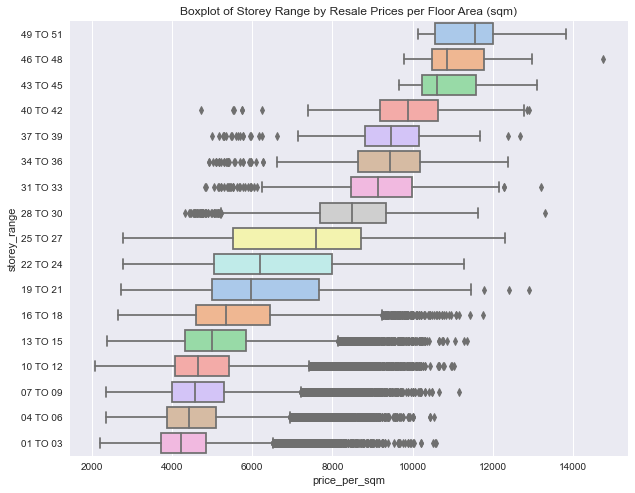

In [76]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_storey_range, x='price_per_sqm', y='storey_range', palette='pastel').set(title='Boxplot of Storey Range by Resale Prices per Floor Area (sqm)')

From the graph, resale price increases as storey range gets higher. 

## Town

[None]

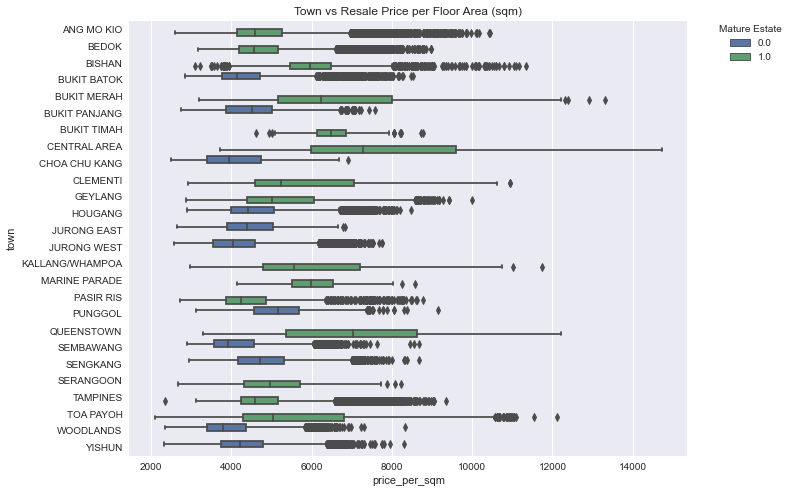

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='town', x='price_per_sqm', hue='mature').set(title='Town vs Resale Price per Floor Area (sqm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0).set(title='Mature Estate')

[Text(0, 0, 'Non-Mature'), Text(1, 0, 'Mature')]

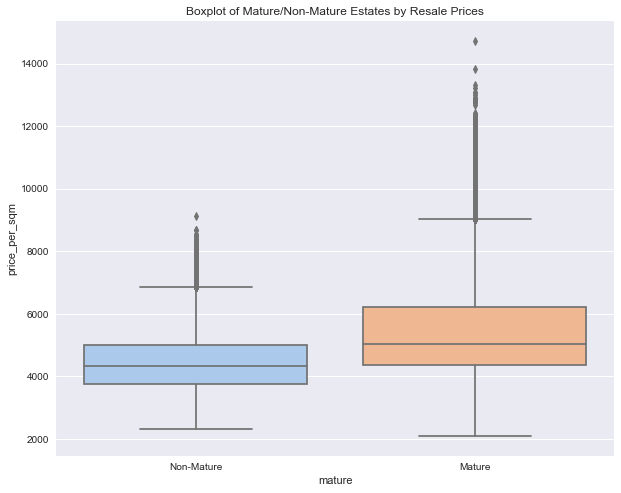

In [80]:
plt.figure(figsize=(10,8))
g = sns.boxplot(data=df, x='mature', y='price_per_sqm', palette='pastel')
g.set(title='Boxplot of Mature/Non-Mature Estates by Resale Prices')
g.set_xticklabels(['Non-Mature','Mature'])

Overall, resale flat prices in mature estates (Bishan, Bukit Timah, Central Area, etc) are more expensive than resale flats in non-mature estates (Bukit Batok, Jurong West, Yishun, etc).

## Remaining Lease

Text(0.5, 0.98, 'Resale Price per Floor Area (sqm) vs Remaining Lease (years) by Year Sold')

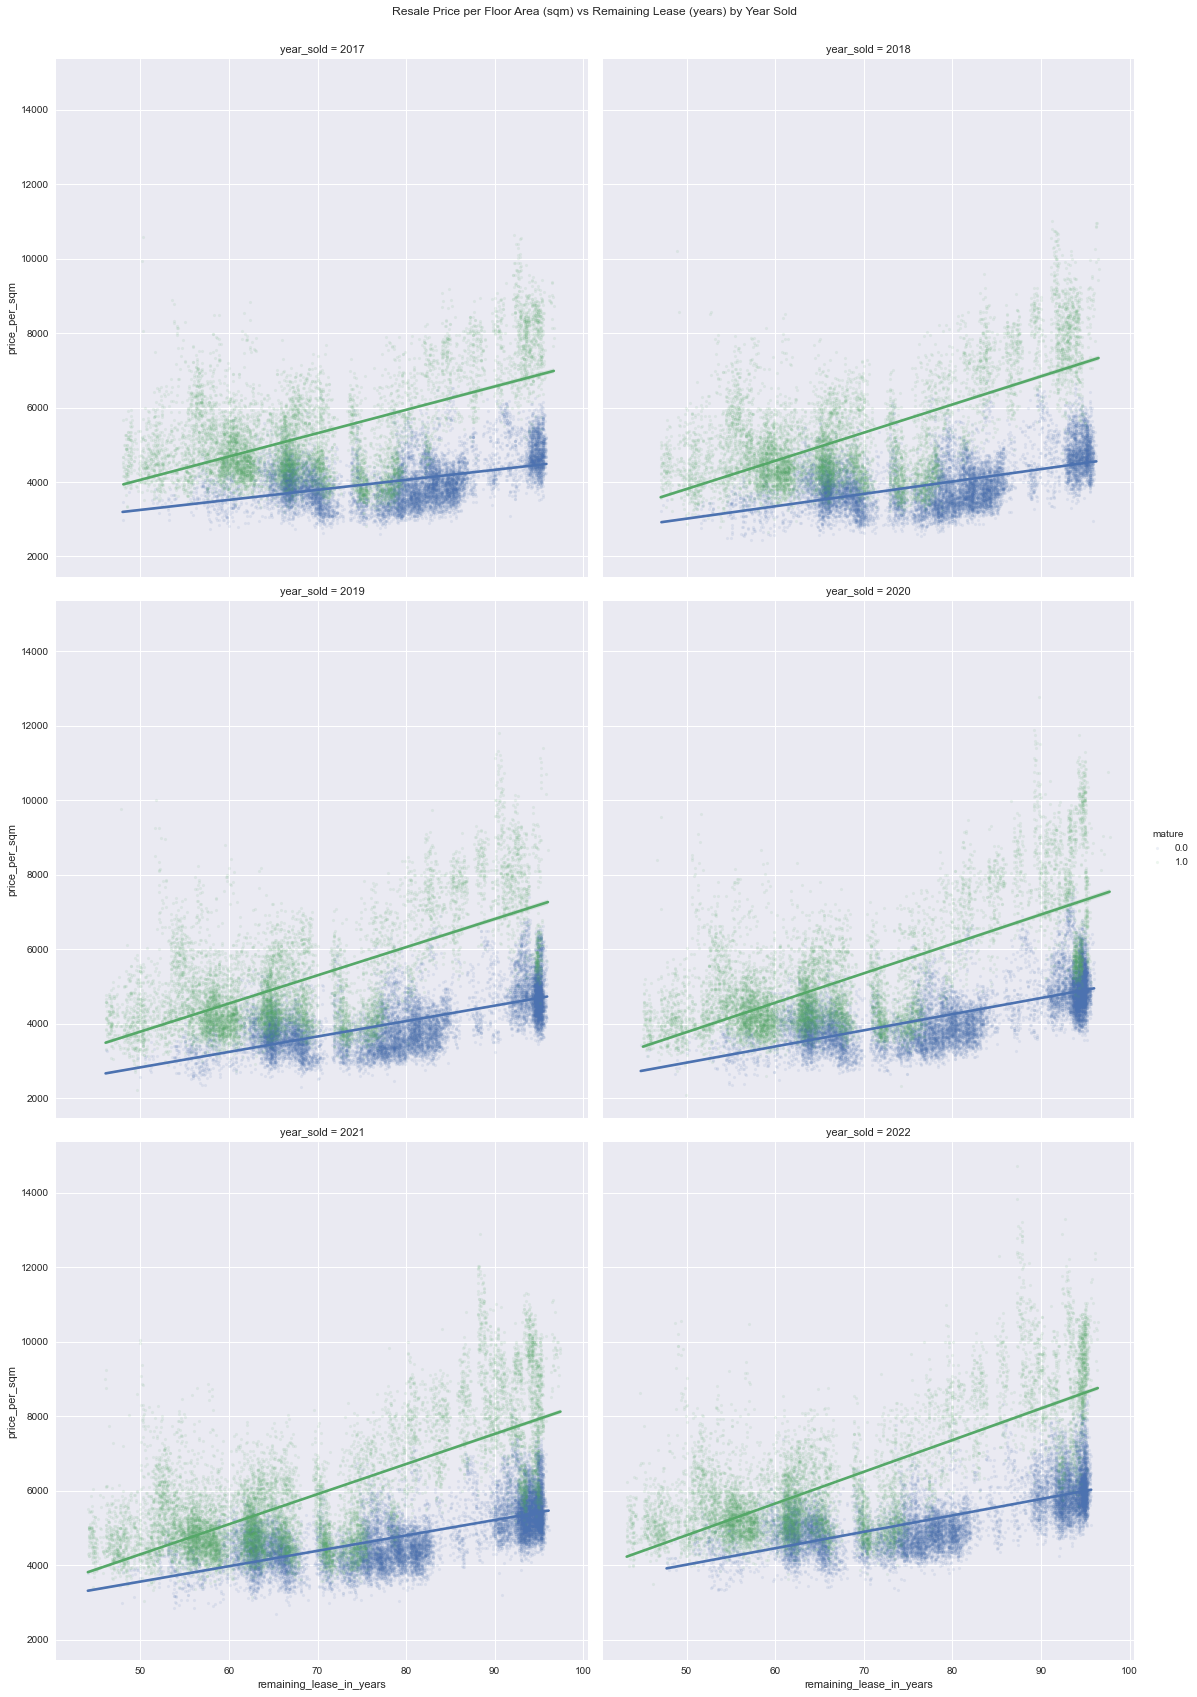

In [45]:
lm = sns.lmplot(data=df, x="remaining_lease_in_years", y="price_per_sqm", col="year_sold", col_wrap=2, hue='mature', 
           scatter_kws={"s": 10, "alpha":0.1}, height=8)
lm.fig.subplots_adjust(top=0.95)
lm.fig.suptitle('Resale Price per Floor Area (sqm) vs Remaining Lease (years) by Year Sold')

In [46]:
#rel = sns.relplot(data=df, x='remaining_lease_in_years', y='price_per_sqm', col='year_sold', col_wrap=2, kind='line', hue='mature', height=8, aspect=1.5)

#rel.fig.subplots_adjust(top=1)
#rel.fig.suptitle('Resale Price per Floor Area (sqm) vs Remaining Lease (years)')

#for ax in rel.axes.flat:
#    for label in ax.get_xticklabels():
#        label.set_rotation(45)

Resale flat prices increase along with the remaining lease.

## Month

In [86]:
df_month = df.sort_values(by=['month'], ascending=True)

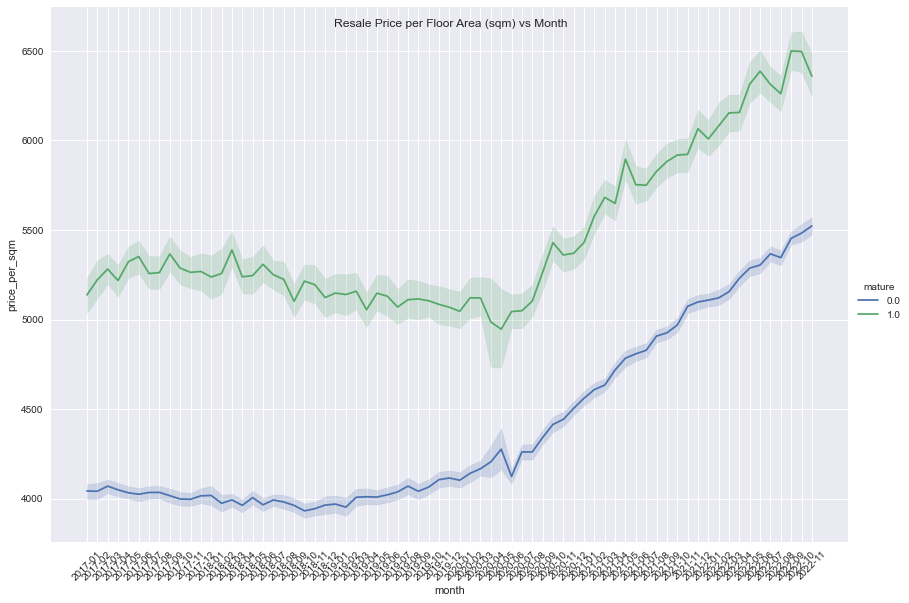

In [125]:
rel = sns.relplot(data=df_month, x='month', y='price_per_sqm', kind='line', hue='mature', height=8, aspect=1.5)

rel.fig.subplots_adjust(top=1)
rel.fig.suptitle('Resale Price per Floor Area (sqm) vs Month')

for ax in rel.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

From Jan 2017 to April 2020, mature estate resale flat prices are decreasing steadily whereas non-mature estate resale flat prices are increasing steadily.

After the circuit breaker (May 2020 onwards), resale flat prices in Singapore begin to soar.

# Conclusion

From this EDA, floor area and flat type greatly affects the price of resale flat.

Positive correlations are seen in 'resale_price' with features such as 'floor_area_sqm' which is the floor area per square meter of the resale flat, 'flat_type_rank' which is the rank of flat types, 'lease_commence_date' which is the year of lease commence,  'remaining_lease_in_years', 'year_sold', 'mature' which classifies town into mature/non-mature estates (1 = Mature, 0 = Non-Mature), 'units_rank' which ranks the resale flat according to storey_range (1 = low floor, 2 = mid-floor, 3 = high-floor).

Categorical features 'flat_type', 'storey_range', 'town' do have an affect on the 'resale_price' values as seen in the plots and should be used in training the model.

Features which should be dropped as they do not show any or little correlation to 'resale_price' are 'longitude', 'latitude'.